# Machine Learning
#### Scikit-learn calculation:
* Residual sum of squares: $RSS = \sum \limits _{i = 1} ^{m}e^2_i$, where $e_i = y_i - \hat y_i$ is the forecast error
* Naive error: $ S_m = \sum \limits _{i = 1} ^{m}(y_i - \bar y)^2 $, where $ \bar y = \frac {1}{m} \sum \limits _{i = 1} ^{m}y_i$ is the sample mean
* $R^2 = 1 - \frac {RSS}{S_m} $ 

#### Performance objectives:
* Mean Square Error: $MSE = \frac{1}{m}\sum\limits_{i}(y_i-\hat y_i)^2$
* Mean Absolute Error: $MAE = \frac{1}{m}\sum\limits_{i}\lvert y_i-\hat y_i\rvert$ (less sensitive to extreme values)
* $R^2$ (can be negative for test sample if the model is terrible)

### Linear Regression
* Predicts future target values based on the historical feature values.
* Doesn't make sense in case of qualitative multi-class problems when there is no ordering (0 - apple,1 - mango...)  - classification works better then.
* $y_i = \beta_0 + \beta_1 X_i + \epsilon_i $
* $\hat y_i = b_0 + b_1 X_i$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# Sample size m
m = 20
# Number of features n
n = 1
# Random feature X
X = np.random.normal(size=(m,n),loc=0,scale=1.)
# Random noise
e = np.random.normal(size=(m,1),loc=0,scale=1.)
# Target y
y = X + e
# Linear regression object
lr = LinearRegression(fit_intercept=True)
# Full sample fit
lr.fit(X, y)
print("Score (R-squared):")
print(lr.score(X,y))
print("Intercept:")
print(lr.intercept_)
print("Coefficient:")
print(lr.coef_)

Score (R-squared):
0.7742089909262329
Intercept:
[-0.09058507]
Coefficient:
[[0.98693378]]


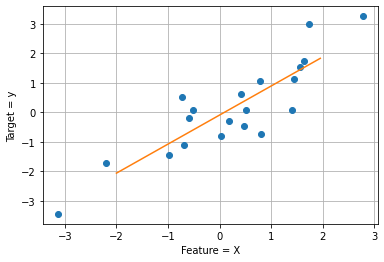

In [2]:
### PLOT ###
# Range of X values for target prediction (yhat)
# If this is not set, prediction line will only cover the current data points
# It visually looks better if the prediction line is slightly longer 
xfeature = np.arange(start=-2.0,stop=2.0,step=0.05)
# Convert to matrix (because of scikit-learn)
xf = xfeature.reshape(len(xfeature),1)
# Estimate predicted values of y
yhat = lr.predict(xf)
# Scatter Plot of data points
plt.plot(X,y,"o")
# Plot target prediction line
plt.plot(xf,yhat)
# Add axis labels
plt.xlabel("Feature = X")
plt.ylabel("Target = y")
plt.grid()

# Optionally set the axis range
# plt.xlim(-2, 2)
# plt.ylim(-4.5,2)

### Polynomial Features
* $ \hat y_i = b_0 + b_1 X_i + b_2 X^2_i + b_3 X^3_i + \ldots $

In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Set up a 7 degree polynomial (include_bias=False eliminates intercept)
poly = PolynomialFeatures(degree=7,include_bias=False)
Xpoly = poly.fit_transform(X)
lr.fit(Xpoly,y)
print(lr.score(Xpoly,y))

0.8705576178109822


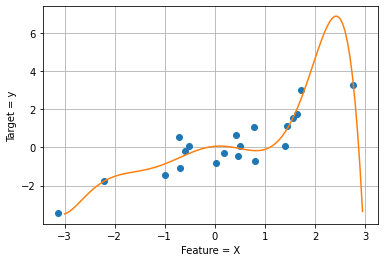

In [5]:
### PLOT ###
xfeature = np.arange(start=-3,stop=3,step=0.05)
xf = xfeature.reshape(len(xfeature),1)
# Add powers of X
xfPoly = poly.fit_transform(xf)
yhat = lr.predict(xfPoly)
# Scatter Plot of data points
plt.plot(X,y,'o')
# Plot target prediction line
plt.plot(xfeature,yhat)
plt.xlabel("Feature = X")
plt.ylabel("Target = y")
plt.grid()

### Bias-Variance Trade-off
* $ MSE = error + Var + Bias^2 $, where error cannot be eliminated
* Standard Linear Regression is unbiased (bias = 0)
* Some machine learning models reduce variance by having bias, and overall improve the performance
* Both Ridge and Lasso are biased

### Ridge Regression
* Model penalizes for larger coefficients
* Also known as shrinkage estimator because it shrinks the coefficients to zero
* When a feature does not contribute much in RSS reduction, its coefficient is close to zero
* The prediction is not a straight line
* Ridge is sensitive to scaling data, it performs better on scaled
* $ RSS = \sum \limits _{i=1}^{m}(y_i - w_o - \sum \limits _{j=1}^{n}w_j x_{i,j})^2 $
* $ L_R = RSS + \alpha \sum \limits _{j=1}^{n} w_j^2 $, where $\alpha$ is a hyperparameter that controls the tolerance of large coefficients, higher $\alpha $ pushes the coefficients to zero more strongly (can be greater than 1), when $\alpha$ is very small, the results are nearly the same as linear regression
* Penalty for Ridge is called L2

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
print(ridge.score(X,y))

### Lasso Regression
* Linear model, does not identify non-linear relations
* Similar to Ridge, but the penalty is L1
* It set the useless coefficients to zero, Ridge keeps them very small
* Can be used to eliminate the non-important coefficients
* $ RSS = \sum \limits _{i=1}^{m}(y_i - w_o - \sum \limits _{j=1}^{n}w_j x_{i,j})^2 $
* $ L_R = RSS + \alpha \sum \limits _{j=1}^{n} \lvert w_j \rvert$, where $\alpha$ is a hyperparameter that controls the tolerance of large coefficients
* $\alpha $ in Ridge and Lasso are in different units
* Both Ridge and Lasso can sometimes better forecast than traditional econometric models with only statistically significant predictors

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(X,y)
print(lasso.score(X,y))

#### Ridge and Lasso
* Good when there are many predictors
* Can reduce overfitting
* Work well on clean test data

### Elastic Net
* (Just for the information)
* Combines Ridge (L2) and Lasso (L1) penalties
* $ RSS = \sum \limits _{i=1}^{m}(y_i - w_o - \sum \limits _{j=1}^{n}w_j x_{i,j})^2 $
* $ L_R = RSS + r\alpha \sum \limits _{j=1}^{n} \lvert w_j \rvert + \frac {1-r}{2}\alpha \sum \limits _{j=1}^{n}w_i^2$, where $r$ is a weight parameter

### Cross-validation
> cross_validate(modelObj,X,y,cv=cv_method) returns a dictionary so results are accessed: cv_model ['test_score']
> cross_val_score(modelObj,X,y,cv=cv_method) returns a scores vector 
#### Random train_test_split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

lr.fit(X_train, y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8123614091928469
0.6203856342582543


In [ ]:
# Alternatively
from sklearn.metrics import accuracy_score
y_fc = lr.predict(X_test)
print(accuracy_score(y_test, y_fc))

#### Shuffle split
* Standard randomized cross-validation

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
shuffle = ShuffleSplit(n_splits=50, test_size=.25)
shuffle_cv = cross_validate(lr, X, y, cv=shuffle,return_train_score=True)
print(np.mean(shuffle_cv['train_score']))
print(np.mean(shuffle_cv['test_score']))

from sklearn.model_selection import cross_val_score
cvScores = cross_val_score(lr, X, y, cv=shuffle)
# Only returns test scores
print(np.mean(cvScores))

0.7531659380093481
0.49730213774990334
0.35714064101068904


#### K-fold
* Splits data set in k parts k number of times, each time k-1 parts are train and 1 is test
* No randomness, the scores are always the same because it uses the entire data set at different times
* Minimum k is usually 3; 5 is common; 10 when data set is large

In [9]:
k = 10
k_folds = cross_validate(lr, X, y, cv=k,return_train_score=True)
print(np.mean(k_folds['train_score']))
print(np.mean(k_folds['test_score']))

0.7713817117893857
-7365.007309487211


In [ ]:
from sklearn.model_selection import cross_val_predict
# method='predict' returns 0 and 1 based of 0.5 threshold
# method='decision_function' sums up the values:
#    negative up to -1 if it thinks it is 0, 0 if it doesn't know, positive up to 1 if it thinks it is 1
y_train_pred = cross_val_predict(modelObj, X_train, y,_train cv=k, method='predict')

#### Stratified
* Randomly selects train and test sets in a way that replicates the proportions of classes from the original data set

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified = StratifiedShuffleSplit(n_splits=50, test_size=0.25)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=k)

### Undersampling
* When data set is not balanced, takes all data points with uncommon value, and randomly chooses the same sample size from the data points with the more common value
* It balanced the data set at cost of losing data

### Oversampling
* Balances the data set by repeating uncommon values to match the sample size of the common ones
* Problematic because it repeat data

### SMOTE - Synthetic Minority Over-sampling Technique
* Instead of repeating the same uncommon data points, it generates random ones

### Overfitting Problem
* Model performs a lot better on the training data than the test data, because it fits noise, not structure, and does not generalize well
* Adding extra parameters (making the model more complex) will almost always improve the training score
* Irrelevant features add noise, optimal model is not the most complex one
#### Solutions
* Increase the full data set
* Simplify the model (Regularization penalizes model complexity), complexity reduces MSE, but increases penalty:

    $L_r = L + R(C)$, where L is the learning rate)

In [16]:
# Generate linear data for experiments
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if std(eps) = 1)
    sigNoise = np.sqrt(1./M)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=N,loc=0,scale=noise)
    y = np.sum(X,axis=1)+eps
    return X,y
X, y = genLinData(200,50,1.0)
# 50 predictors for sample size 200 is too many so there will be overfitting

#### Generating data for classification
* Generating points around two different means, classifying as 0 or 1, and randomly mixing

In [17]:
# Initiate sample sizes m0, m1 and the mean values mean0, mean1
m0 = m1 = 25
mean0, mean1 = -0.5, 0.5
# Generate normally distributed random data points around given means
X0 = np.random.normal(size=(m0,2),loc=mean0,scale=1.)
X1 = np.random.normal(size=(m1,2),loc=mean1,scale=1.)
# Initiate target values to zeroes and ones
y0, y1 = np.zeros(m0), np.ones(m1)
# Join data into a single column
X = np.append(X0,X1,axis=0)
y = np.append(y0,y1)
# Randomly mix the data points
rnd_mix = np.random.permutation(m0+m1)
X, y = X[rnd_mix], y[rnd_mix]

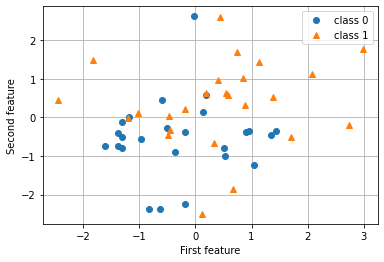

In [18]:
### PLOT ###
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',label="class 0")
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',label="class 1")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()
plt.grid()

### Logistic Regression
* Classification method that only works for linear relations in data (doesn't work for non-linear relations)
* Calculates probabilities, and returns 1 if p > 0.5, else 0
### $P(y_i = 1 | X_i) = p(X_i) = \frac{e^{w_0+\sum \limits _{j = 1}^{n}w_jX_{i,j}}}{1+e^{w_0+\sum \limits _{j = 1}^{n}w_jX_{i,j}}}$

In [19]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
# Penalty = None means standard logistic regression, could be L2 and L1 (then parameter C should be set, where alpha = 1/C)
# Solver = 'lbfgs' keeps adjusting parameters, fastest solver="sag", solver='liblinear'
# max_iter=2000, if error then this number should be larger otherwise it stops before finding the right model
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)
# Score is equal to accuracy (fraction that is correct)
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.6
0.72


#### Stohastic Gradient Descent

In [20]:
from sklearn.linear_model import SGDClassifier
# Logistic regression with a faster optimizer, threshold is 0
# loss='log' is standard logistic
# tol is tolerance and it says when to stop
sgd_clf = SGDClassifier(loss="log",max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
print(sgd_clf.score(X_train, y_train))
print(sgd_clf.score(X_test, y_test))

0.76
0.64


#### Monte-Carlo simulations function

In [21]:
def monteCarlo(num,X,y,modelObj,test_frac):
    '''
    Input: int num is number of simulations, example for modelObj: lr = LinearRegression(fit_intercept=True)
    Output: np.arrays trainScore and testScore, each score is based on a random train/test split
    '''
    # Initialize np.arrays
    trainScores = np.zeros(num)
    testScores  = np.zeros(num)
    # Split data num times and each time store train and test results
    for i in range(num):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_frac)
        modelObj.fit(X_train,y_train)
        trainScores[i] = modelObj.score(X_train,y_train)
        testScores[i]  = modelObj.score(X_test,y_test)
    return trainScores,testScores

In [22]:
lr = LogisticRegression(penalty="none",solver="lbfgs")
trainS, testS = monteCarlo(250,X,y,lr,0.5)
print(np.mean(trainS))
print(np.mean(testS))

0.72192
0.64176


### K-nearest Neighbors
#### Regression
* Calculates the mean value of k nearest data points, it does not fit an equation (pure non-parametric model)
* Prediction line will not be straight, it will connect local means
* $\hat y_i = \frac {1}{k} \sum \limits _{j=1}^{k} y_j$

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = reg = KNeighborsRegressor(n_neighbors=7)
knnreg.fit(X,y)
print(knnreg.score(X,y))

### K-nearest Neighbors
#### Classifier
* Finds k nearest data points by measuring Euclidean distance, then forecasts based on the most frequent value
* Smaller number of neighbors means more complex model, large number means average of a lot of data points
* Works for both linear and non-linear relationships
* Odd number of neighbors prevents from using secondary tools for calculating the distance in case of the same distance between two data points
* Handles multi-class problems well
* Scaling and preprocessing the data matters! It is very important
* It performs best on large data sets but it gets slow
* $d_{i,j} = (\sum \limits _{h=1}^{n}(X_{i,h} - X_{j,h})^2)^\frac{1}{2}$, where n is number of dimensions in the space

In [23]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test, y_test))

0.6
0.68


In [24]:
trainS, testS = monteCarlo(250,X,y,knn,0.5)
print(np.mean(trainS))
print(np.mean(testS))

0.7585599999999999
0.64224


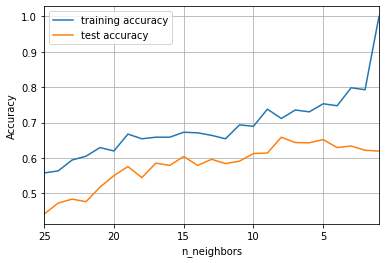

In [25]:
# Set upper number of neighbors N, and the step
N = 25
step = 1
# Initialize np.arrays for results
neighbors_range = range(1,N+1,step)
training_accuracy = np.zeros(len(neighbors_range))
test_accuracy = np.zeros(len(neighbors_range))
# Try n_neighbors from 1 to N, with given step
for i in range(1,len(neighbors_range)+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    trainS, testS = monteCarlo(100,X,y,knn,0.5)
    # record train accuracy
    training_accuracy[i-1] = np.mean(trainS)
    # record test accuracy
    test_accuracy[i-1] = np.mean(testS)

### PLOT ###
plt.plot(neighbors_range, training_accuracy, label="training accuracy")
plt.plot(neighbors_range, test_accuracy, label="test accuracy")
plt.xlim(N, 1)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid();

### Naive predictor
* Good benchmark for model performance, it is a guess of the most frequent value

In [ ]:
from sklearn.base import BaseEstimator
class GuessClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
modelObj = GuessClassifier()

In [ ]:
from sklearn.dummy import DummyClassifier
# Random classifier [0,1] with same 0.5 probability
dmy = DummyClassifier(strategy='uniform')
dmy.fit(X,y)
print(dmy.score(X,y))

### Confusion matrix

|     |Prediction F |Prediction T |
| --- | :---: | :---: |
|Negative| TN | FP (type I error) |
|Positive| FN (type II error) | TP |

* Accuracy = $\frac{TN+TP}{Total} $ = $\frac{Correct Predictions}{Total Predictions} $
---
* Precision = $\frac{TP}{TP + FP} $ = $\frac{Correct Positive Predictions}{Total Positive Predictions} $ What is the precision of the positive tests?
---
* Recall = $\frac{TP}{TP + FN} $ = $\frac{Correct Positive Predictions}{Total Positive} $ What is the rate of detecting positive cases? (Power of the test)
---

#### False Positive (Type I error)
* Incorrectly reject true $H_0$
* Type I error rate = $\frac{FP}{FP + TN} $ = $\frac{False Positive Predictions}{Total Positive} $ Incorectly marked positive

#### False Negative (Type II error)
* Incorrectly keep false $H_0$
* Type II error rate = $\frac{FN}{TP + FN} $= $\frac{False Negative Predictions}{Total Positive} $ Missed positive cases

In [26]:
from sklearn.metrics import confusion_matrix
# Default threshold for prediction is 0.5
y_test_pred = lr.predict(X_test) 
confusMatrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusMatrix.ravel()
print(confusMatrix)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))

[[8 5]
 [5 7]]
0.5833333333333334
0.5833333333333334


In [27]:
# Alternatively, set the threshold
threshold = 0.7
y_test_prob = lr.predict_proba(X_test)[:,1]
y_test_pred = y_test_prob > threshold
confusMatrix = confusion_matrix(y_test, y_test_pred)
print(confusMatrix)

[[10  3]
 [ 6  6]]


In [28]:
# Alternatively, use decision function which measures the distance from the boundary that separates the two types
# (if there are two consentrations of data points, and a line in between, the farther away the data point from this
# boundary line is, it is more likely to belong to the data concentration group on that side of the boundary)
# When threshold is 0 then one side is positive distances, other is negative
threshold = 0
decisionFunc = lr.decision_function(X_test)
y_test_pred = decisionFunc > threshold
confusMatrix = confusion_matrix(y_test, y_test_pred)
print(confusMatrix)

[[8 5]
 [5 7]]


### ROC curve
* Plots type I error rate (False positive) vs Recall (power)
* When these are the same (diagonal line), the model is useless

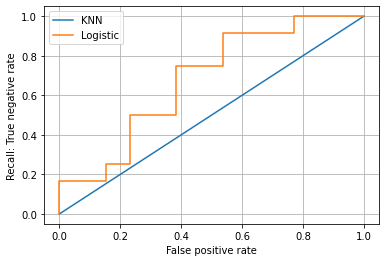

In [29]:
from sklearn.metrics import roc_curve

# Roc_curve automatically recognizes probabilities vs scores, input can be either
y_probs_knn = knn.predict_proba(X_test)[:,1]
y_probs_lr  = lr.predict_proba(X_test)[:,1]

fprknn, tprknn, thresholds = roc_curve(y_test, y_probs_knn)
fprlr, tprlr, thresholds =   roc_curve(y_test, y_probs_lr)

### PLOT ###
plt.plot(fprknn,tprknn,label='KNN')
plt.plot(fprlr,tprlr,label='Logistic')
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('Recall: True negative rate')
plt.legend();

### Area under the curve (AUC)
* Measure of distance away from the diagonal line where type I error rate equals recall
* The bigger the area under the curve is, the better

In [30]:
from sklearn.metrics import roc_auc_score
# 0.5 score means random, 1.0 means perfect
print(roc_auc_score(y_test, y_probs_knn))
print(roc_auc_score(y_test, y_probs_lr))

0.5
0.6794871794871795


### Multiclass problem
(sklearn automatically recognizes when there are multi classes)
* Ordered (both regression and classification can work)
* Unordered (regression makes no sense)

Controlled by specifing in modelObj:
* multi_class = 'ovr' One vs. rest (compares one at the time with everything else), SGDclassifier uses ovr
* multi_class = 'ovo' One vs. one (good for extremely large data sets)
* multi_class = 'multinomial'

### Label encoder
Maps characters to numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X[column] = enc.fit_transform(X[column])


### The Random Forest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
y_probas_forest = cross_val_predict(forest, X_train, y_train, cv=3, method="predict_proba")